In [1]:
# Imports
import sqlite3
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load in data set
satellite_df = pd.read_csv('data/UCS-Satellite-DB.csv')
satellite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Current Official Name of Satellite  7560 non-null   object
 1   Country of Operator/Owner           7560 non-null   object
 2   Users                               7560 non-null   object
 3   Purpose                             7560 non-null   object
 4   Detailed Purpose                    1254 non-null   object
 5   Class of Orbit                      7560 non-null   object
 6   Date of Launch                      7559 non-null   object
 7   Launch Site                         7560 non-null   object
 8   Unnamed: 8                          484 non-null    object
 9   Unnamed: 9                          484 non-null    object
 10  Unnamed: 10                         484 non-null    object
 11  Unnamed: 11                         484 non-null    obje

In [3]:
# Only keep certain columns
satellite_df = satellite_df[['Current Official Name of Satellite', 'Country of Operator/Owner', 'Users', 'Purpose', 'Class of Orbit', 'Date of Launch', 'Launch Site']]
satellite_df

,Current Official Name of Satellite,Country of Operator/Owner,Users,Purpose,Class of Orbit,Date of Launch,Launch Site
0,1HOPSAT-TD,USA,Commercial,Earth Observation,LEO,12/11/2019,Satish Dhawan Space Centre
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,Commercial,Earth Observation,LEO,1/3/2023,Cape Canaveral
2,Aalto-1,Finland,Civil,Technology Development,LEO,6/23/2017,Satish Dhawan Space Centre
3,AAt-4,Denmark,Civil,Earth Observation,LEO,4/25/2016,Guiana Space Center
4,ABS-2,Multinational,Commercial,Communications,GEO,2/6/2014,Guiana Space Center
...,...,...,...,...,...,...,...
7555,Ziyuan 1-02C,China,Government,Earth Observation,LEO,12/22/2011,Taiyuan Launch Center
7556,Ziyuan 1-2D,China,Government,Earth Observation,LEO,9/14/2019,Taiyuan Launch Center
7557,Ziyuan 3,China,Government,Earth Observation,LEO,1/9/2012,Taiyuan Launch Center
7558,Ziyuan 3-2,China,Government,Earth Observation,LEO,5/29/2016,Taiyuan Launch Center


In [4]:
# Rename Columns to be more concise & SQL friendly
satellite_df = satellite_df.rename(columns={
    'Current Official Name of Satellite': 'Satellite_Name',
    'Country of Operator/Owner': 'Operator_Country',
    'Purpose': 'Mission',
    'Class of Orbit': 'Orbit',
    'Launch Site': 'Launch_Site'})
satellite_df

,Satellite_Name,Operator_Country,Users,Mission,Orbit,Date of Launch,Launch_Site
0,1HOPSAT-TD,USA,Commercial,Earth Observation,LEO,12/11/2019,Satish Dhawan Space Centre
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,Commercial,Earth Observation,LEO,1/3/2023,Cape Canaveral
2,Aalto-1,Finland,Civil,Technology Development,LEO,6/23/2017,Satish Dhawan Space Centre
3,AAt-4,Denmark,Civil,Earth Observation,LEO,4/25/2016,Guiana Space Center
4,ABS-2,Multinational,Commercial,Communications,GEO,2/6/2014,Guiana Space Center
...,...,...,...,...,...,...,...
7555,Ziyuan 1-02C,China,Government,Earth Observation,LEO,12/22/2011,Taiyuan Launch Center
7556,Ziyuan 1-2D,China,Government,Earth Observation,LEO,9/14/2019,Taiyuan Launch Center
7557,Ziyuan 3,China,Government,Earth Observation,LEO,1/9/2012,Taiyuan Launch Center
7558,Ziyuan 3-2,China,Government,Earth Observation,LEO,5/29/2016,Taiyuan Launch Center


In [12]:
# Convert Launch Date to DateTime
satellite_df['Launch_Date'] = pd.to_datetime(satellite_df['Date of Launch'], yearfirst=True)

# Create a new column to store the year
satellite_df['Launch_Year'] = satellite_df['Launch_Date'].dt.year.convert_dtypes()

# Only keep missions that were launched between 2015 to Present
sats2015_df = satellite_df[satellite_df['Launch_Year'] >= 2015]
sats2015_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6708 entries, 0 to 7559
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Satellite_Name    6708 non-null   object        
 1   Operator_Country  6708 non-null   object        
 2   Users             6708 non-null   object        
 3   Mission           6708 non-null   object        
 4   Orbit             6708 non-null   object        
 5   Date of Launch    6708 non-null   object        
 6   Launch_Site       6708 non-null   object        
 7   Launch_Date       6708 non-null   datetime64[ns]
 8   Launch_Year       6708 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), object(7)
memory usage: 530.6+ KB


In [13]:
# Check for null values
sats2015_df.isnull().sum()

Satellite_Name      0
Operator_Country    0
Users               0
Mission             0
Orbit               0
Date of Launch      0
Launch_Site         0
Launch_Date         0
Launch_Year         0
dtype: int64

In [14]:
# Moving on to Missions, get an idea of Mission Categories
sats2015_df.groupby('Mission').size()

Mission
Communications                              5083
Earth Observation                           1013
Earth Observation                              3
Earth Observation/Earth Science                1
Earth Observation/Navigation                   9
Earth Observation/Space Science                1
Earth Observation/Technology Development       3
Earth Science                                 25
Earth Science/Earth Observation                1
Earth/Space Observation                        4
Educational                                    1
Meteorological                                 6
Mission Extension Technology                   2
Navigation/Global Positioning                 81
Navigation/Regional Positioning                9
Platform                                       1
Satellite Positioning                          1
Space Observation                              5
Space Science                                 58
Space Science/Technology Demonstration         1
Space Scienc

In [ ]:
# Create a new column for Primary Mission and create a function that will pull primary mission from Mission List
def primary_mission(mission):
    primary_msns = [
    'Communications',
    'Earth Observation',
    'Navigation',
    'Meteorological',
    'Space Observation',
    'Space Science',
    'Technology Development',
    'Unknown'
    ] 
    
    if pd.isnull(mission):
        return 'Other'
    
    missions = [m.strip().title() for m in mission.split('/')]

    for m in missions:
        if m in primary_msns:
            return m
    return 'Other'

sats2015_df['Primary_Mission'] = sats2015_df['Mission'].apply(primary_mission)
sats2015_df

In [ ]:
sats2015_df.groupby('Primary_Mission').size()

In [23]:
# Check consistencies in Orbits, make them all upper case
sats2015_df['Orbit'] = sats2015_df['Orbit'].str.strip().str.upper()
sats2015_df.groupby('Orbit').size()

C:\Users\thatc\AppData\Local\Temp\ipykernel_32852\641348949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sats2015_df['Orbit'] = sats2015_df['Orbit'].str.strip().str.upper()


Orbit
ELLIPTICAL      24
GEO            250
LEO           6354
MEO             80
dtype: int64

In [26]:
# Assign Frequency Bands to Each Satellite
frequency_band_mapping = {
    'Communications': 'C/Ku/Ka',
    'Earth Observation': 'X/S',
    'Navigation': 'L',
    'Meteorological': 'S/X',
    'Space Observation': 'S/X/Ka',
    'Space Science': 'S/X/Ka',
    'Technology Development': 'S/X/Ka/Ku',
    'Other' : 'Other',
    'Unknown': 'Unknown'
}

sats2015_df['Frequency_Band'] = sats2015_df['Primary_Mission'].map(frequency_band_mapping)
sats2015_df.groupby('Frequency_Band').size()

C:\Users\thatc\AppData\Local\Temp\ipykernel_32852\2205875236.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sats2015_df['Frequency_Band'] = sats2015_df['Primary_Mission'].map(frequency_band_mapping)


Frequency_Band
C/Ku/Ka      5083
L              90
Other         112
S/X             6
S/X/Ka         69
S/X/Ka/Ku     307
Unknown        10
X/S          1031
dtype: int64

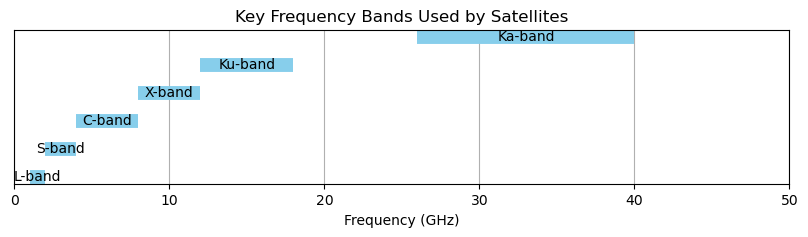

In [25]:
# Frequency Band Diagram
bands = ['L', 'S', 'C', 'X', 'Ku', 'Ka']
freq_ranges = [(1,2), (2,4), (4,8), (8,12), (12,18), (26,40)]

plt.figure(figsize=(10,2))
for i, (start, end) in enumerate(freq_ranges):
    plt.hlines(y=i, xmin=start, xmax=end, color='skyblue', linewidth=10)
    plt.text((start+end)/2, i, f'{bands[i]}-band', ha='center', va='center', color='black')

plt.xlabel('Frequency (GHz)')
plt.yticks([])
plt.title('Key Frequency Bands Used by Satellites')
plt.xlim(0, 50)
plt.grid(axis='x')
plt.show()

In [ ]:
# Put rows that I want to keep into new dataframe.
finalsats_df = sats2015_df[['Satellite_Name', 'Operator_Country', 'Users', 'Orbit', 'Launch_Site', 'Launch_Year', 'Primary_Mission', 'Frequency_Band']]
finalsats_df

,Satellite_Name,Operator_Country,Users,Orbit,Launch_Site,Launch_Year,Primary_Mission,Frequency_Band
0,1HOPSAT-TD,USA,Commercial,LEO,Satish Dhawan Space Centre,2019,Earth Observation,X/S
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,Commercial,LEO,Cape Canaveral,2023,Earth Observation,X/S
2,Aalto-1,Finland,Civil,LEO,Satish Dhawan Space Centre,2017,Technology Development,S/X/Ka/Ku
3,AAt-4,Denmark,Civil,LEO,Guiana Space Center,2016,Earth Observation,X/S
5,ABS-2A,Multinational,Commercial,GEO,Cape Canaveral,2016,Communications,C/Ku/Ka
...,...,...,...,...,...,...,...,...
7553,OHS-3,China,Commercial,LEO,Jiuquan Satellite Launch Center,2018,Earth Observation,X/S
7554,OHS-4,China,Commercial,LEO,Jiuquan Satellite Launch Center,2018,Earth Observation,X/S
7556,Ziyuan 1-2D,China,Government,LEO,Taiyuan Launch Center,2019,Earth Observation,X/S
7558,Ziyuan 3-2,China,Government,LEO,Taiyuan Launch Center,2016,Earth Observation,X/S


In [35]:
finalsats_df.groupby('Users').size()

Users
Civil                     134
Civil/Commercial            1
Civil/Government            4
Civil/Military              3
Commercial               5748
Commercial                  1
Commercial/Civil            4
Commercial/Government       1
Commercial/Military         2
Government                359
Government                  1
Government/Civil           18
Government/Commercial      85
Government/Military         1
Military                  272
Military/Civil              4
Military/Commercial        30
Military/Government        40
dtype: int64

In [38]:

# Create a new column for Primary User and create a function that will pull primary user from Users List
def primary_user(users):
    p_user = [
    'Civil',
    'Commercial',
    'Government',
    'Military',
    'Other',
    'Unknown'
    ] 
    
    if pd.isnull(users):
        return 'Other'
    
    users = [u.strip().title() for u in users.split('/')]

    for u in users:
        if u in p_user:
            return u
    return 'Other'

finalsats_df['Primary_User'] = finalsats_df['Users'].apply(primary_user)
finalsats_df


C:\Users\thatc\AppData\Local\Temp\ipykernel_32852\1743398410.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalsats_df['Primary_User'] = finalsats_df['Users'].apply(primary_user)


,Satellite_Name,Operator_Country,Users,Orbit,Launch_Site,Launch_Year,Primary_Mission,Frequency_Band,Primary_User
0,1HOPSAT-TD,USA,Commercial,LEO,Satish Dhawan Space Centre,2019,Earth Observation,X/S,Commercial
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,Commercial,LEO,Cape Canaveral,2023,Earth Observation,X/S,Commercial
2,Aalto-1,Finland,Civil,LEO,Satish Dhawan Space Centre,2017,Technology Development,S/X/Ka/Ku,Civil
3,AAt-4,Denmark,Civil,LEO,Guiana Space Center,2016,Earth Observation,X/S,Civil
5,ABS-2A,Multinational,Commercial,GEO,Cape Canaveral,2016,Communications,C/Ku/Ka,Commercial
...,...,...,...,...,...,...,...,...,...
7553,OHS-3,China,Commercial,LEO,Jiuquan Satellite Launch Center,2018,Earth Observation,X/S,Commercial
7554,OHS-4,China,Commercial,LEO,Jiuquan Satellite Launch Center,2018,Earth Observation,X/S,Commercial
7556,Ziyuan 1-2D,China,Government,LEO,Taiyuan Launch Center,2019,Earth Observation,X/S,Government
7558,Ziyuan 3-2,China,Government,LEO,Taiyuan Launch Center,2016,Earth Observation,X/S,Government


In [40]:
finalsats_df = finalsats_df[['Satellite_Name', 'Operator_Country','Orbit', 'Launch_Site', 'Launch_Year', 'Primary_Mission', 'Frequency_Band', 'Primary_User']]
finalsats_df.groupby('Primary_User').size()

Primary_User
Civil          142
Commercial    5756
Government     464
Military       346
dtype: int64

In [41]:
# To SQL DB
conn = sqlite3.connect('Satellites.db')
finalsats_df.to_sql('Satellites', conn, if_exists='replace', index=False)

6708

In [46]:
# Query to pull primary_mission and frequency_bands
msn_query = ''' 
            SELECT Primary_Mission, Frequency_Band, COUNT(*) AS SatelliteCount
            FROM Satellites
            GROUP BY Primary_Mission, Frequency_Band
        '''

msnfreq_df = pd.read_sql_query(msn_query, conn)
msnfreq_df

,Primary_Mission,Frequency_Band,SatelliteCount
0,Communications,C/Ku/Ka,5083
1,Earth Observation,X/S,1031
2,Meteorological,S/X,6
3,Navigation,L,90
4,Other,Other,112
5,Space Observation,S/X/Ka,9
6,Space Science,S/X/Ka,60
7,Technology Development,S/X/Ka/Ku,307
8,Unknown,Unknown,10


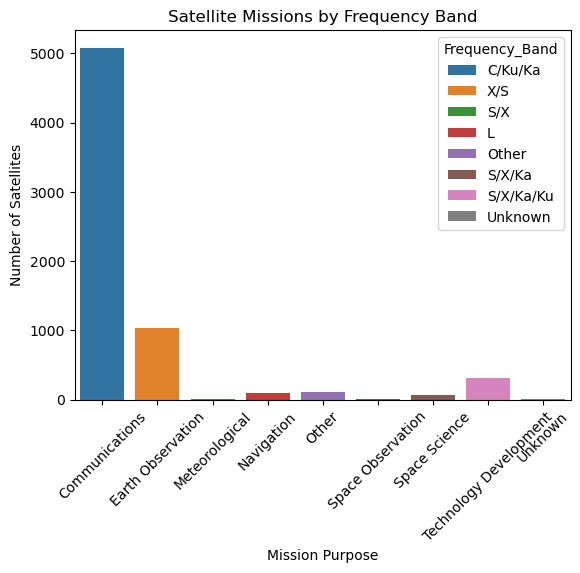

In [48]:
# Bar Chart
sns.barplot(data=msnfreq_df, x='Primary_Mission', y='SatelliteCount', hue='Frequency_Band')
plt.xticks(rotation=45, ha='center')
plt.title('Satellite Missions by Frequency Band')
plt.xlabel('Mission Purpose')
plt.ylabel('Number of Satellites')
plt.show()

In [ ]:
# Split into Separate Bands (AI-assisted)
exploded_df = finalsats_df.assign(Frequency_Band=finalsats_df['Frequency_Band'].str.split('/')).explode('Frequency_Band')
exploded_df

,Satellite_Name,Operator_Country,Orbit,Launch_Site,Launch_Year,Primary_Mission,Frequency_Band,Primary_User
0,1HOPSAT-TD,USA,LEO,Satish Dhawan Space Centre,2019,Earth Observation,X,Commercial
0,1HOPSAT-TD,USA,LEO,Satish Dhawan Space Centre,2019,Earth Observation,S,Commercial
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,LEO,Cape Canaveral,2023,Earth Observation,X,Commercial
1,AAC AIS-Sat1 (Kelpie 1),United Kingdom,LEO,Cape Canaveral,2023,Earth Observation,S,Commercial
2,Aalto-1,Finland,LEO,Satish Dhawan Space Centre,2017,Technology Development,S,Civil
...,...,...,...,...,...,...,...,...
7556,Ziyuan 1-2D,China,LEO,Taiyuan Launch Center,2019,Earth Observation,S,Government
7558,Ziyuan 3-2,China,LEO,Taiyuan Launch Center,2016,Earth Observation,X,Government
7558,Ziyuan 3-2,China,LEO,Taiyuan Launch Center,2016,Earth Observation,S,Government
7559,Ziyuan 3-3,China,LEO,Taiyuan Launch Center,2020,Earth Observation,X,Government


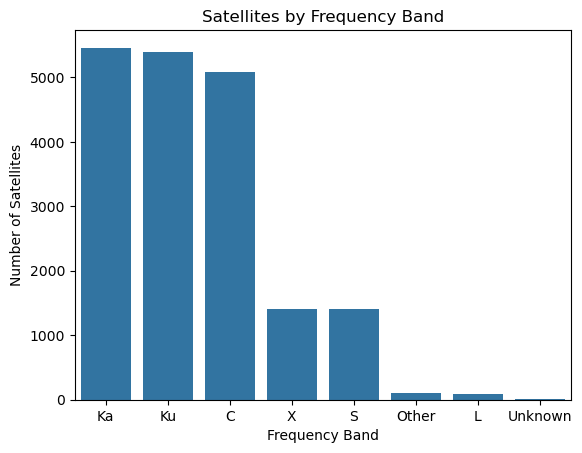

In [ ]:

sns.countplot(data=exploded_df, x='Frequency_Band', order=exploded_df['Frequency_Band'].value_counts().index)
plt.xlabel('Frequency Band')
plt.ylabel('Number of Satellites')
plt.title('Satellites by Frequency Band')
plt.show()

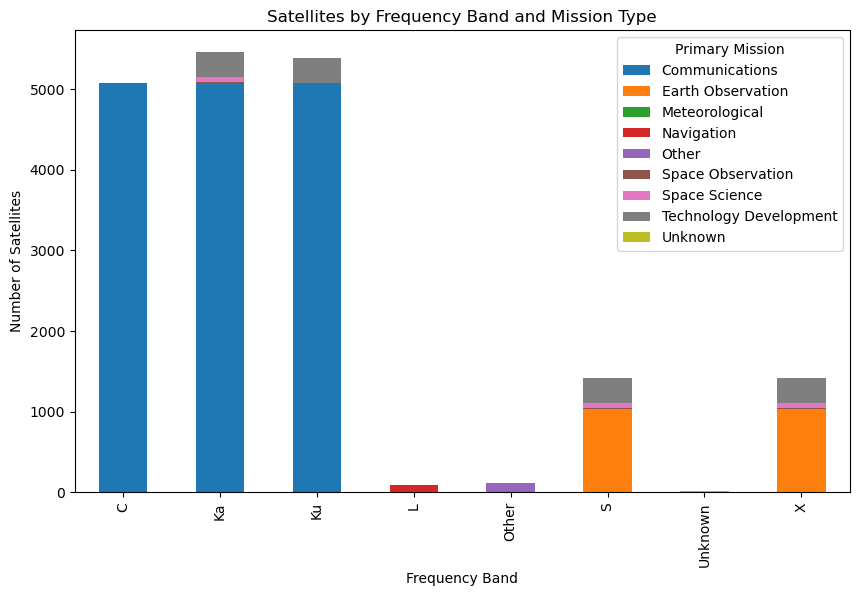

In [53]:
band_mission_counts = pd.crosstab(exploded_df['Frequency_Band'], exploded_df['Primary_Mission'])
band_mission_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Frequency Band')
plt.ylabel('Number of Satellites')
plt.title('Satellites by Frequency Band and Mission Type')
plt.legend(title='Primary Mission')
plt.show()